## Importing libraries



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import missingno as msno

from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score, StratifiedKFold, KFold
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import (accuracy_score,
                            classification_report,
                            recall_score, precision_score, f1_score,
                            confusion_matrix)
from mlxtend.plotting import checkerboard_plot, plot_decision_regions
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('Rta_Dataset.csv')

## Display the data

In [3]:
# By default, it will display first 5 rows of data
data.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [4]:
# By default, it will display last 5 rows of data
data.tail()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
12311,16:15:00,Wednesday,31-50,Male,NaN,Employee,2-5yr,Lorry (11?40Q),Owner,NaN,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12312,18:00:00,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,NaN,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12313,13:55:00,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,...,Other,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,13:55:00,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury
12315,13:55:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Other,Owner,2-5yrs,...,Stopping,Pedestrian,Female,5,3,Driver,Normal,Crossing from nearside - masked by parked or s...,Changing lane to the right,Slight Injury


In [5]:
# By default, it will display 5 random samples of data
data.sample(5)

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
3304,18:16:00,Tuesday,Unknown,Male,Junior high school,Employee,1-2yr,Stationwagen,Owner,Above 10yr,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
11149,18:40:00,Friday,18-30,Male,Junior high school,Employee,2-5yr,Lorry (11?40Q),Owner,NaN,...,Moving Backward,Pedestrian,Female,31-50,2,Driver,Normal,Crossing from nearside - masked by parked or s...,Changing lane to the right,Slight Injury
2608,17:18:00,Tuesday,18-30,Male,Elementary school,Employee,Below 1yr,Pick up upto 10Q,Owner,2-5yrs,...,Going straight,Pedestrian,Male,Over 51,3,Driver,Normal,Unknown or other,Changing lane to the right,Slight Injury
6561,15:20:00,Sunday,Over 51,Male,High school,Employee,2-5yr,Automobile,Governmental,NaN,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Driving under the influence of drugs,Serious Injury
11666,18:39:00,Wednesday,Unknown,Male,Junior high school,Employee,Below 1yr,Public (12 seats),Owner,5-10yrs,...,Going straight,Pedestrian,Male,5,2,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury


## Statistical Data Exploration

In [6]:
# Shape of data
data.shape

(12316, 32)

In [7]:
# Columns of data
data.columns

Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Number_of_vehicles_involved',
       'Number_of_casualties', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity'],
      dtype='object')

We are renaming the columns for better understanding.

In [8]:
col = {
     'Time': 'time',
     'Day_of_week': 'day_of_week',
     'Age_band_of_driver': 'driver_age',
     'Sex_of_driver': 'driver_sex',
     'Educational_level': 'educational_level',
     'Vehicle_driver_relation': 'vehicle_driver_relation',
     'Driving_experience': 'driving_experience',
     'Type_of_vehicle': 'vehicle_type',
     'Owner_of_vehicle': 'vehicle_owner',
     'Service_year_of_vehicle': 'service_year',
     'Defect_of_vehicle': 'vehicle_defect',
     'Area_accident_occured': 'accident_area',
     'Lanes_or_Medians': 'lanes',
     'Road_allignment': 'road_allignment',
     'Types_of_Junction': 'junction_type',
     'Road_surface_type': 'surface_type',
     'Road_surface_conditions': 'road_surface_conditions',
     'Light_conditions': 'light_condition',
     'Weather_conditions': 'weather_condition',
     'Type_of_collision': 'collision_type',
     'Number_of_vehicles_involved': 'vehicles_involved',
     'Number_of_casualties': 'casualties',
     'Vehicle_movement': 'vehicle_movement',
     'Casualty_class': 'casualty_class',
     'Sex_of_casualty': 'casualty_sex' ,
     'Age_band_of_casualty': 'casualty_age',
     'Casualty_severity': 'casualty_severity',
     'Work_of_casuality': 'casualty_work',
     'Fitness_of_casuality': 'casualty_fitness',
     'Pedestrian_movement': 'pedestrian_movement',
     'Cause_of_accident': 'accident_cause',
     'Accident_severity': 'accident_severity'
}

data.rename(columns=col, inplace=True)

In [9]:
# Information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   time                     12316 non-null  object
 1   day_of_week              12316 non-null  object
 2   driver_age               12316 non-null  object
 3   driver_sex               12316 non-null  object
 4   educational_level        11575 non-null  object
 5   vehicle_driver_relation  11737 non-null  object
 6   driving_experience       11487 non-null  object
 7   vehicle_type             11366 non-null  object
 8   vehicle_owner            11834 non-null  object
 9   service_year             8388 non-null   object
 10  vehicle_defect           7889 non-null   object
 11  accident_area            12077 non-null  object
 12  lanes                    11931 non-null  object
 13  road_allignment          12174 non-null  object
 14  junction_type            11429 non-nul

We have only two numerical columns which are "vehicles_involved" and "casualties" and the rest are categorical columns.

In [10]:
# Descriptive statistic of numerical variables
# By default, it will display only numerical variables
data.describe()

,vehicles_involved,casualties
count,12316.000000,12316.000000
mean,2.040679,1.548149
std,0.688790,1.007179
min,1.000000,1.000000
25%,2.000000,1.000000
50%,2.000000,1.000000
75%,2.000000,2.000000
max,7.000000,8.000000


In [11]:
# Descriptive statistic of categorical variables
data.describe(include="object")

,time,day_of_week,driver_age,driver_sex,educational_level,vehicle_driver_relation,driving_experience,vehicle_type,vehicle_owner,service_year,...,vehicle_movement,casualty_class,casualty_sex,casualty_age,casualty_severity,casualty_work,casualty_fitness,pedestrian_movement,accident_cause,accident_severity
count,12316,12316,12316,12316,11575,11737,11487,11366,11834,8388,...,12008,12316,12316,12316,12316,9118,9681,12316,12316,12316
unique,1074,7,5,3,7,4,7,17,4,6,...,13,4,3,6,4,7,5,9,20,3
top,15:30:00,Friday,18-30,Male,Junior high school,Employee,5-10yr,Automobile,Owner,Unknown,...,Going straight,Driver or rider,Male,na,3,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
freq,120,2041,4271,11437,7619,9627,3363,3205,10459,2883,...,8158,4944,5253,4443,7076,5903,9608,11390,2263,10415


In [12]:
# Descriptive statistic of all the variables
data.describe(include="all")

,time,day_of_week,driver_age,driver_sex,educational_level,vehicle_driver_relation,driving_experience,vehicle_type,vehicle_owner,service_year,...,vehicle_movement,casualty_class,casualty_sex,casualty_age,casualty_severity,casualty_work,casualty_fitness,pedestrian_movement,accident_cause,accident_severity
count,12316,12316,12316,12316,11575,11737,11487,11366,11834,8388,...,12008,12316,12316,12316,12316,9118,9681,12316,12316,12316
unique,1074,7,5,3,7,4,7,17,4,6,...,13,4,3,6,4,7,5,9,20,3
top,15:30:00,Friday,18-30,Male,Junior high school,Employee,5-10yr,Automobile,Owner,Unknown,...,Going straight,Driver or rider,Male,na,3,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
freq,120,2041,4271,11437,7619,9627,3363,3205,10459,2883,...,8158,4944,5253,4443,7076,5903,9608,11390,2263,10415
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# Display duplicate values
data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
12311    False
12312    False
12313    False
12314    False
12315    False
Length: 12316, dtype: bool

In [14]:
# Display count of unique values
data.nunique()

time                       1074
day_of_week                   7
driver_age                    5
driver_sex                    3
educational_level             7
vehicle_driver_relation       4
driving_experience            7
vehicle_type                 17
vehicle_owner                 4
service_year                  6
vehicle_defect                3
accident_area                14
lanes                         7
road_allignment               9
junction_type                 8
surface_type                  5
road_surface_conditions       4
light_condition               4
weather_condition             9
collision_type               10
vehicles_involved             6
casualties                    8
vehicle_movement             13
casualty_class                4
casualty_sex                  3
casualty_age                  6
casualty_severity             4
casualty_work                 7
casualty_fitness              5
pedestrian_movement           9
accident_cause               20
accident

In [15]:
data.isnull().sum()

time                          0
day_of_week                   0
driver_age                    0
driver_sex                    0
educational_level           741
vehicle_driver_relation     579
driving_experience          829
vehicle_type                950
vehicle_owner               482
service_year               3928
vehicle_defect             4427
accident_area               239
lanes                       385
road_allignment             142
junction_type               887
surface_type                172
road_surface_conditions       0
light_condition               0
weather_condition             0
collision_type              155
vehicles_involved             0
casualties                    0
vehicle_movement            308
casualty_class                0
casualty_sex                  0
casualty_age                  0
casualty_severity             0
casualty_work              3198
casualty_fitness           2635
pedestrian_movement           0
accident_cause                0
accident

In [16]:
data.groupby('accident_severity').size()

accident_severity
Fatal injury        158
Serious Injury     1743
Slight Injury     10415
dtype: int64

## Data Exploration using Visualization



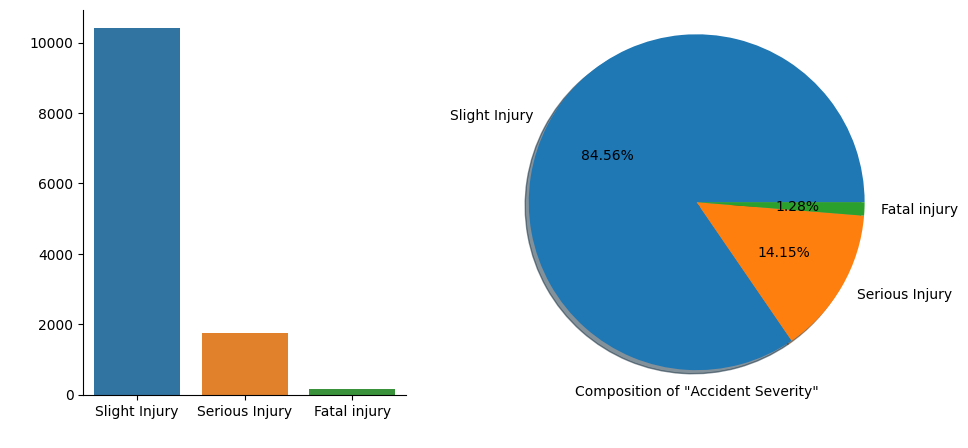

In [17]:
# Checking target values
plt.figure(figsize=(10, 5))

## Barplot
ax1 = plt.subplot(1,2,1)
cp = sns.countplot(x = data["accident_severity"])
ax1.set_xlabel(" ")
ax1.set_ylabel(" ")
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
sns.despine(top=True, right=True)

## Pieplot
ax2 = plt.subplot(1,2,2)
plt.pie(data["accident_severity"].value_counts(),
        labels=list(data["accident_severity"].unique()),
        autopct = '%1.2f%%',
        pctdistance=0.6,
        shadow=True,
        radius=1.3,
        textprops={'fontsize':10}
        )
ax2.set_xlabel(" ")
plt.xlabel('Composition of "Accident Severity"', fontsize=10, labelpad=15)
plt.subplots_adjust(wspace=0.4)
plt.show()

As we can see, the dataset is highly unbalanced. Now, let's check the missing values using missing number library.

<Axes: >

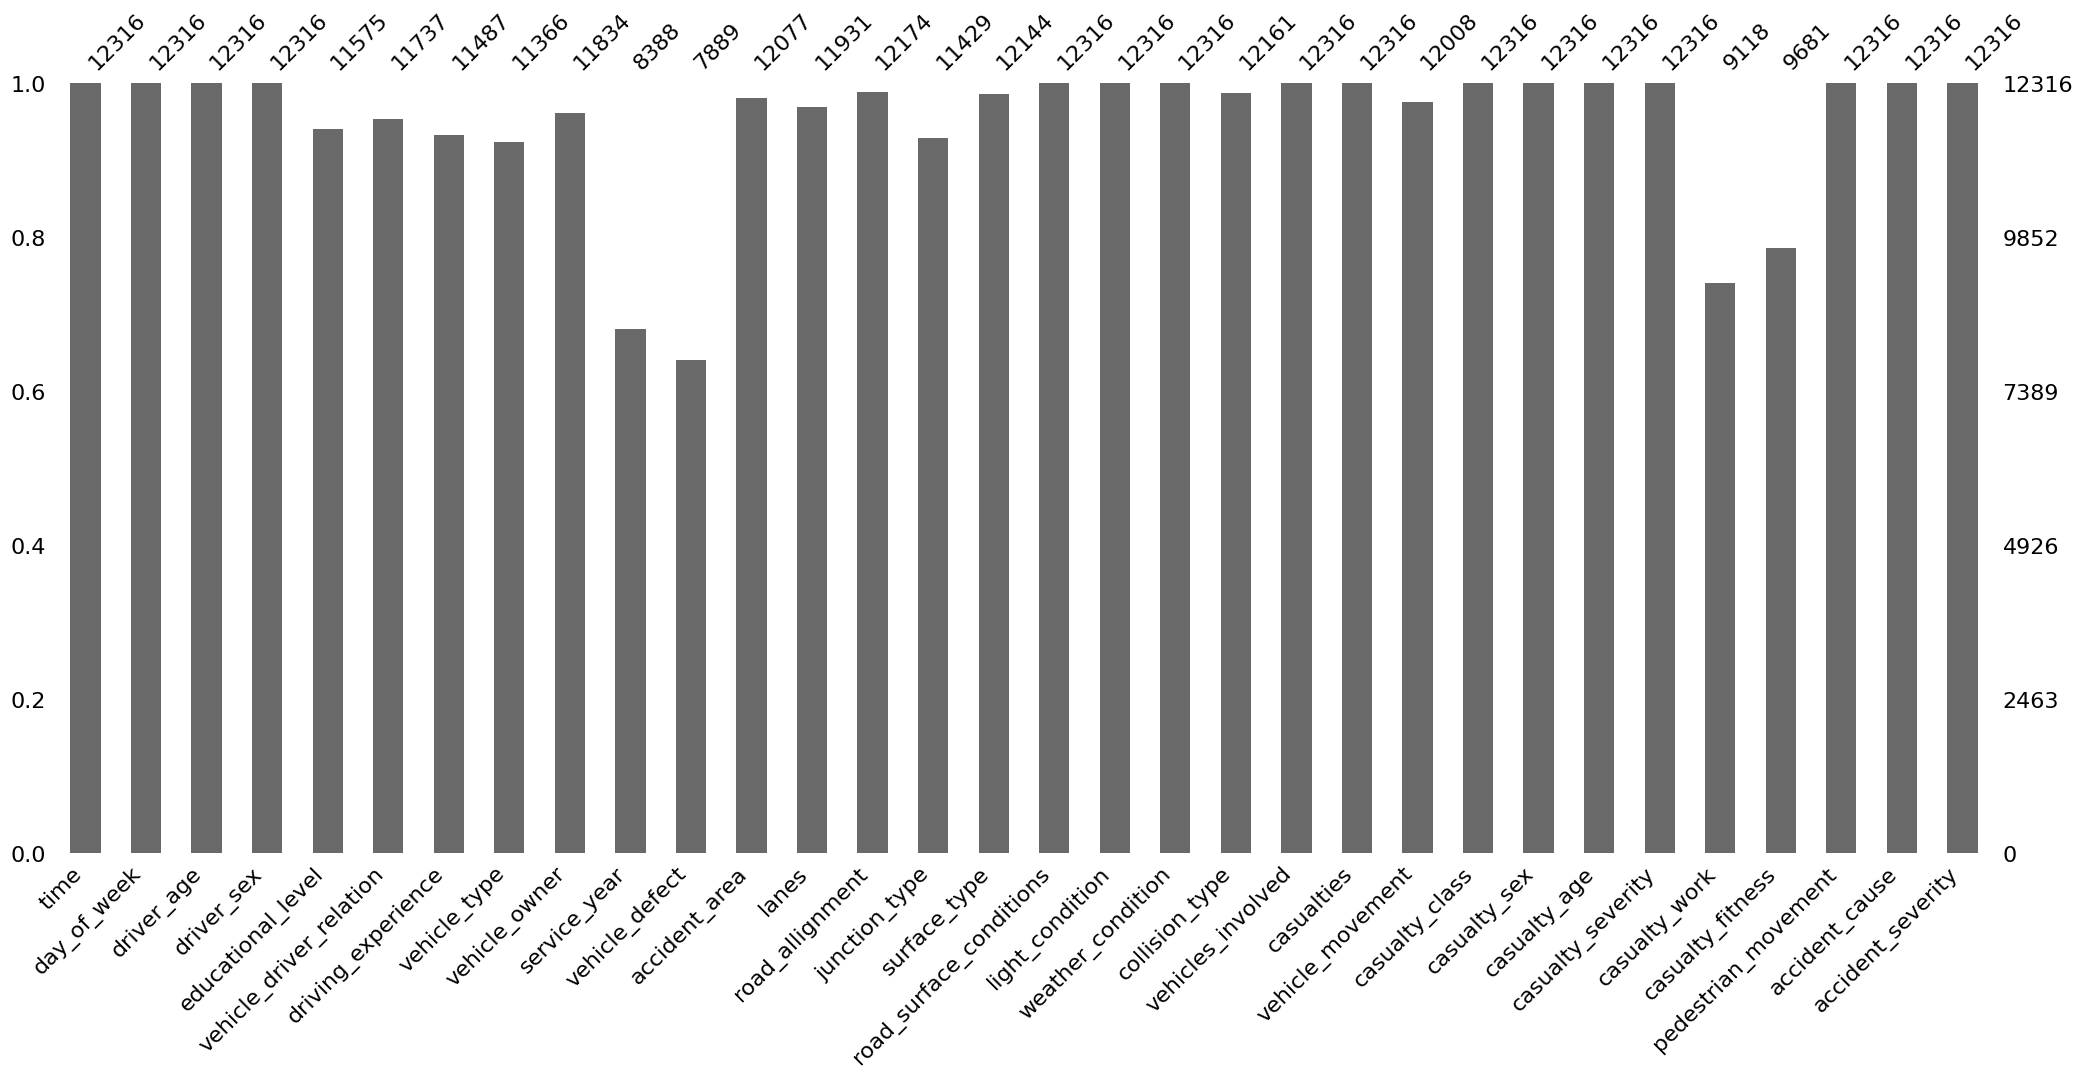

In [18]:
# Checking missing values
msno.bar(data)

<Axes: >

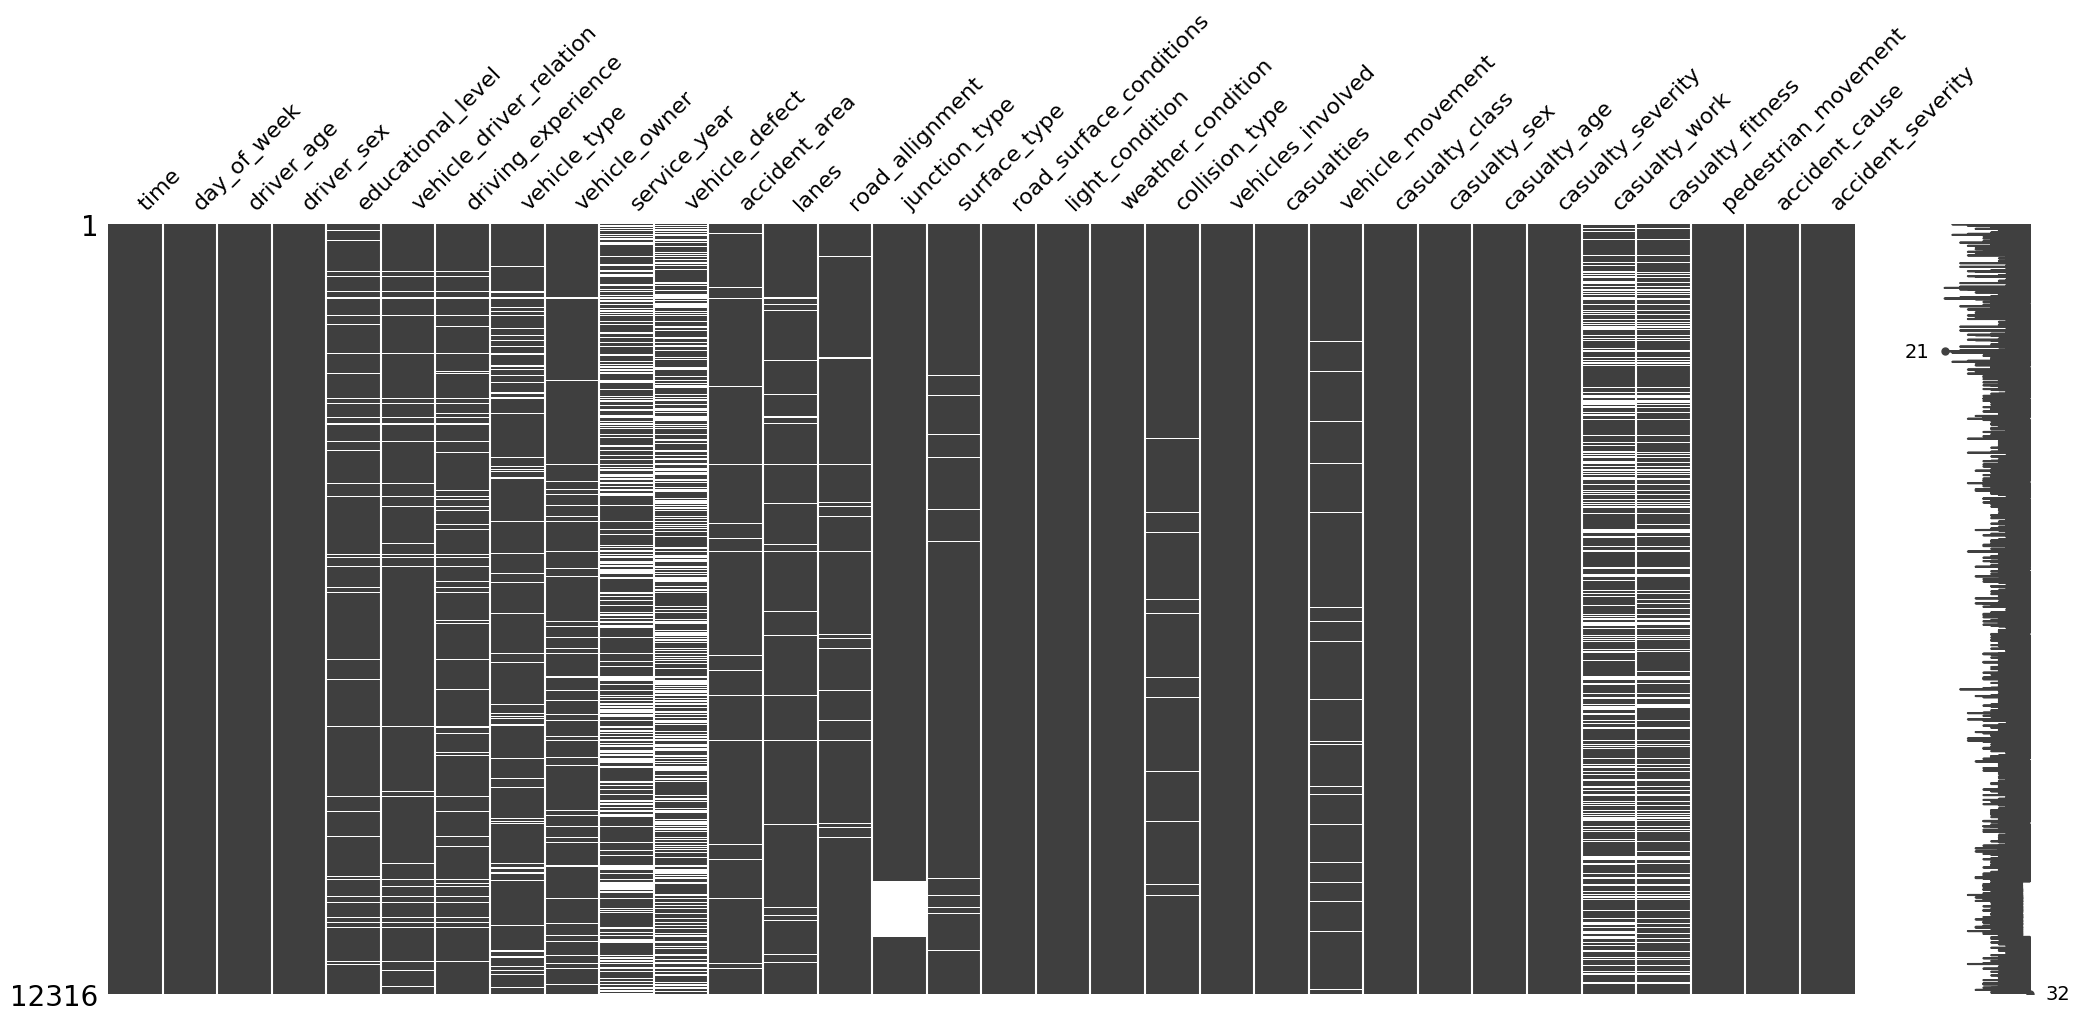

In [19]:
msno.matrix(data)

From the above matrix we can see that we have 16 columns with missing values. Since, we have only two numerical features. Let's visualise them first.

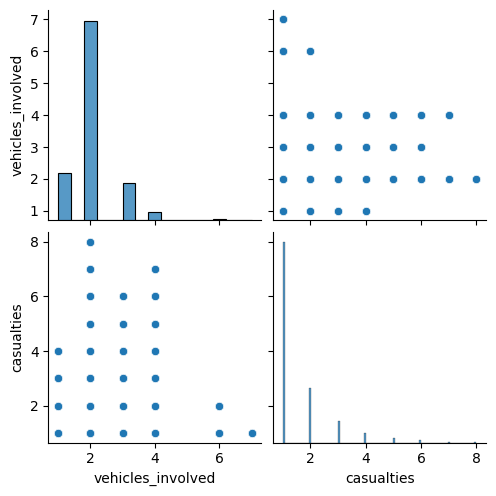

In [20]:
sns.pairplot(data[['vehicles_involved','casualties']])
plt.show()

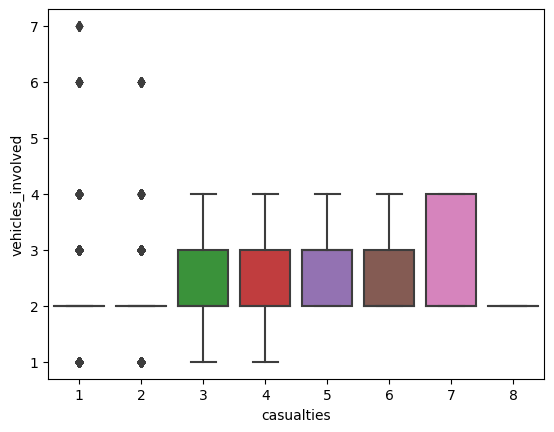

In [21]:
sns.boxplot(data=data, y='vehicles_involved', x='casualties')
plt.show()

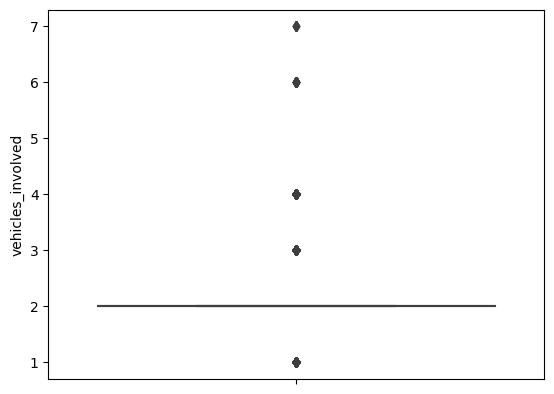

In [22]:
sns.boxplot(data=data, y='vehicles_involved')
plt.show()

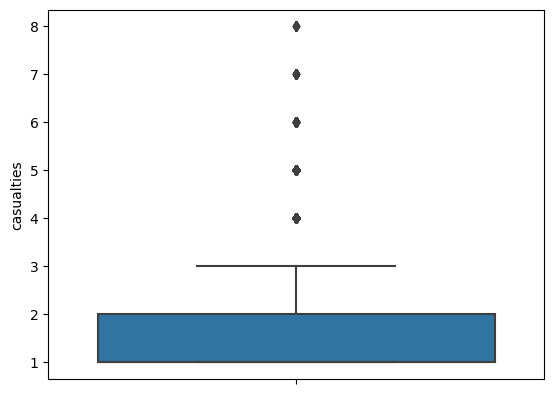

In [23]:
sns.boxplot(data=data, y='casualties')
plt.show()

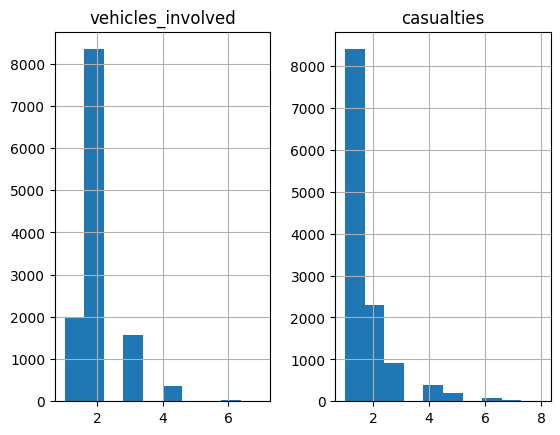

In [24]:
data.hist()
plt.show()

Now, let's visualise categorical columns.

In [25]:
# Categorical columns of data
data_cat = data.select_dtypes(include = ['object']).columns.values
data_cat

array(['time', 'day_of_week', 'driver_age', 'driver_sex',
       'educational_level', 'vehicle_driver_relation',
       'driving_experience', 'vehicle_type', 'vehicle_owner',
       'service_year', 'vehicle_defect', 'accident_area', 'lanes',
       'road_allignment', 'junction_type', 'surface_type',
       'road_surface_conditions', 'light_condition', 'weather_condition',
       'collision_type', 'vehicle_movement', 'casualty_class',
       'casualty_sex', 'casualty_age', 'casualty_severity',
       'casualty_work', 'casualty_fitness', 'pedestrian_movement',
       'accident_cause', 'accident_severity'], dtype=object)

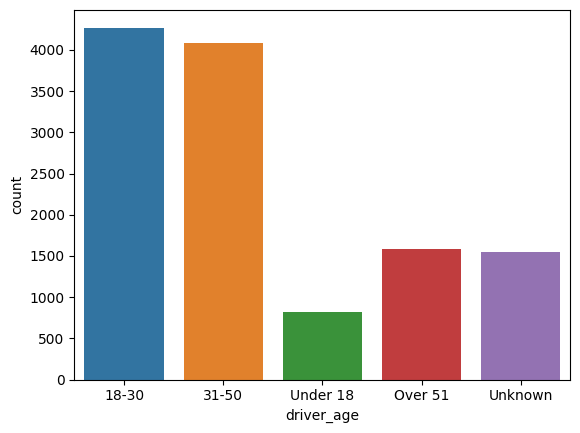

In [26]:
sns.countplot(data=data, x='driver_age')
plt.show()

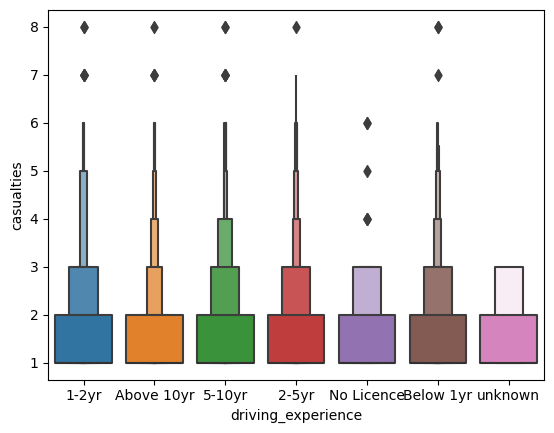

In [27]:
sns.boxenplot(data=data, x='driving_experience', y='casualties')
plt.show()

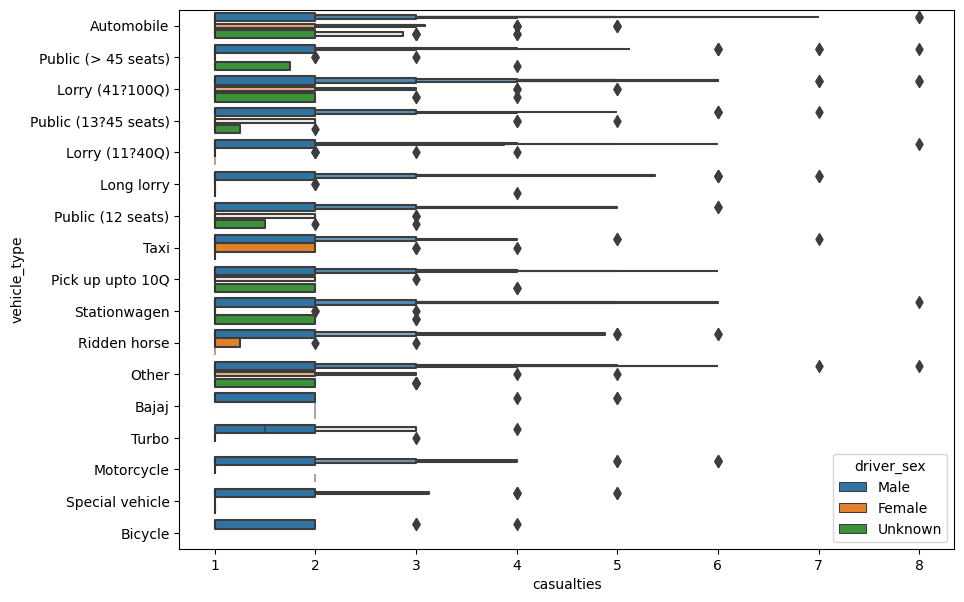

In [28]:
plt.figure(figsize=(10,7))
sns.boxenplot(data=data, x='casualties', y='vehicle_type', hue='driver_sex')
plt.show()

Most accidents are from automobiles and driven by male.

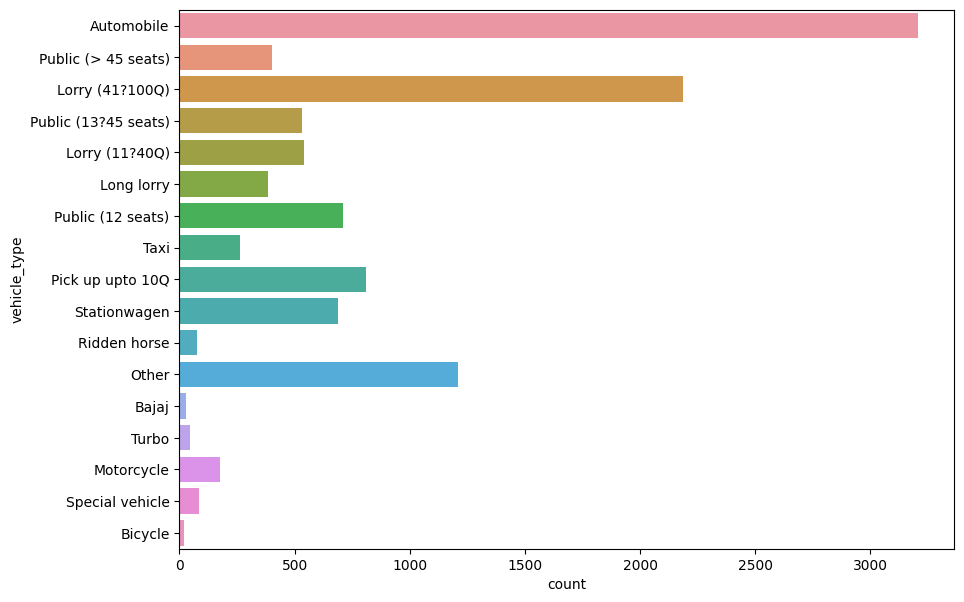

In [29]:
plt.figure(figsize=(10,7))
sns.countplot(y=data['vehicle_type'])
plt.show()

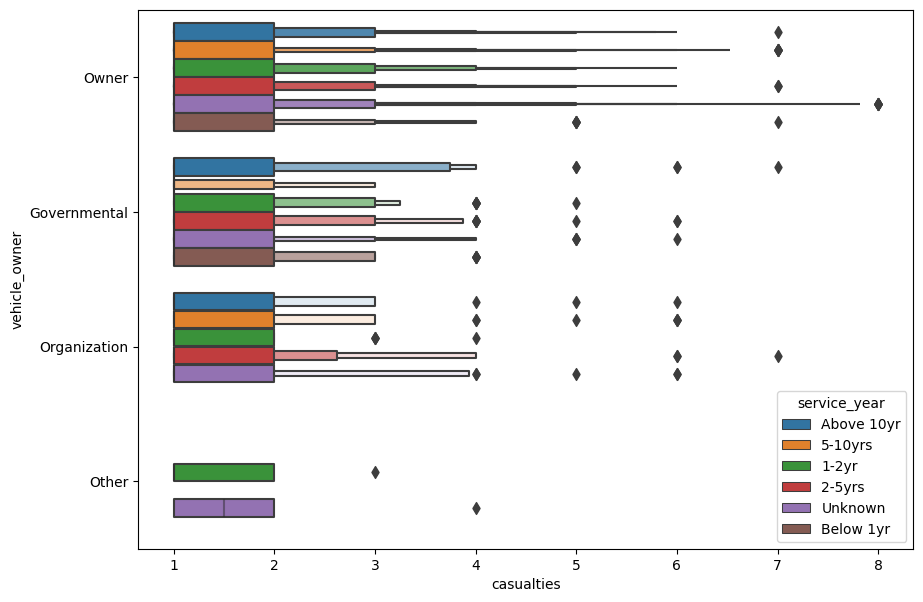

In [30]:
plt.figure(figsize=(10,7))
sns.boxenplot(data=data, x='casualties', y='vehicle_owner', hue='service_year')
plt.show()

In [31]:
pd.crosstab(index=data['accident_severity'],columns=data['driving_experience'])

driving_experience,1-2yr,2-5yr,5-10yr,Above 10yr,Below 1yr,No Licence,unknown
accident_severity,,,,,,,
Fatal injury,21,46,41,29,7,0,1
Serious Injury,228,381,462,323,207,13,6
Slight Injury,1507,2186,2860,1910,1128,105,26


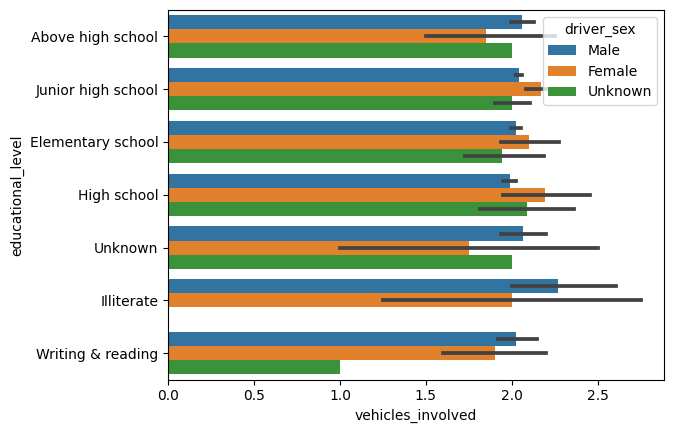

In [32]:
sns.barplot(data=data, y='educational_level', x='vehicles_involved', hue='driver_sex')
plt.show()

## Preprocessing

In [33]:
data.shape

(12316, 32)

In [34]:
data.isnull().sum()

time                          0
day_of_week                   0
driver_age                    0
driver_sex                    0
educational_level           741
vehicle_driver_relation     579
driving_experience          829
vehicle_type                950
vehicle_owner               482
service_year               3928
vehicle_defect             4427
accident_area               239
lanes                       385
road_allignment             142
junction_type               887
surface_type                172
road_surface_conditions       0
light_condition               0
weather_condition             0
collision_type              155
vehicles_involved             0
casualties                    0
vehicle_movement            308
casualty_class                0
casualty_sex                  0
casualty_age                  0
casualty_severity             0
casualty_work              3198
casualty_fitness           2635
pedestrian_movement           0
accident_cause                0
accident

In [35]:
# dropping columns which cause imbalance
data.drop(columns=['driver_age', 'vehicle_driver_relation', 'casualty_work', 'casualty_fitness'], inplace=True)

In [36]:
impute_cols = [x for x in data.isna().sum()[data.isna().sum() != 0].index.tolist()]
for fea in impute_cols:
  mode = data[fea].mode()[0]
  data[fea].fillna(mode, inplace=True)

In [37]:
data.isna().sum()

time                       0
day_of_week                0
driver_sex                 0
educational_level          0
driving_experience         0
vehicle_type               0
vehicle_owner              0
service_year               0
vehicle_defect             0
accident_area              0
lanes                      0
road_allignment            0
junction_type              0
surface_type               0
road_surface_conditions    0
light_condition            0
weather_condition          0
collision_type             0
vehicles_involved          0
casualties                 0
vehicle_movement           0
casualty_class             0
casualty_sex               0
casualty_age               0
casualty_severity          0
pedestrian_movement        0
accident_cause             0
accident_severity          0
dtype: int64

### Encoding

In [38]:
LE = LabelEncoder()
data = data.apply(LE.fit_transform)
data.shape

(12316, 28)

In [39]:
data.head()

,time,day_of_week,driver_sex,educational_level,driving_experience,vehicle_type,vehicle_owner,service_year,vehicle_defect,accident_area,...,vehicles_involved,casualties,vehicle_movement,casualty_class,casualty_sex,casualty_age,casualty_severity,pedestrian_movement,accident_cause,accident_severity
0,420,1,1,0,0,0,3,3,2,9,...,1,1,2,3,2,5,3,5,9,2
1,420,1,1,4,3,11,3,2,2,6,...,1,1,2,3,2,5,3,5,16,2
2,420,1,1,4,0,5,3,5,2,1,...,1,1,2,0,1,1,2,5,0,1
3,594,3,1,4,2,11,0,5,2,6,...,1,1,2,2,0,0,2,5,1,2
4,594,3,1,4,1,0,3,2,2,4,...,1,1,2,3,2,5,3,5,16,2


<Axes: >

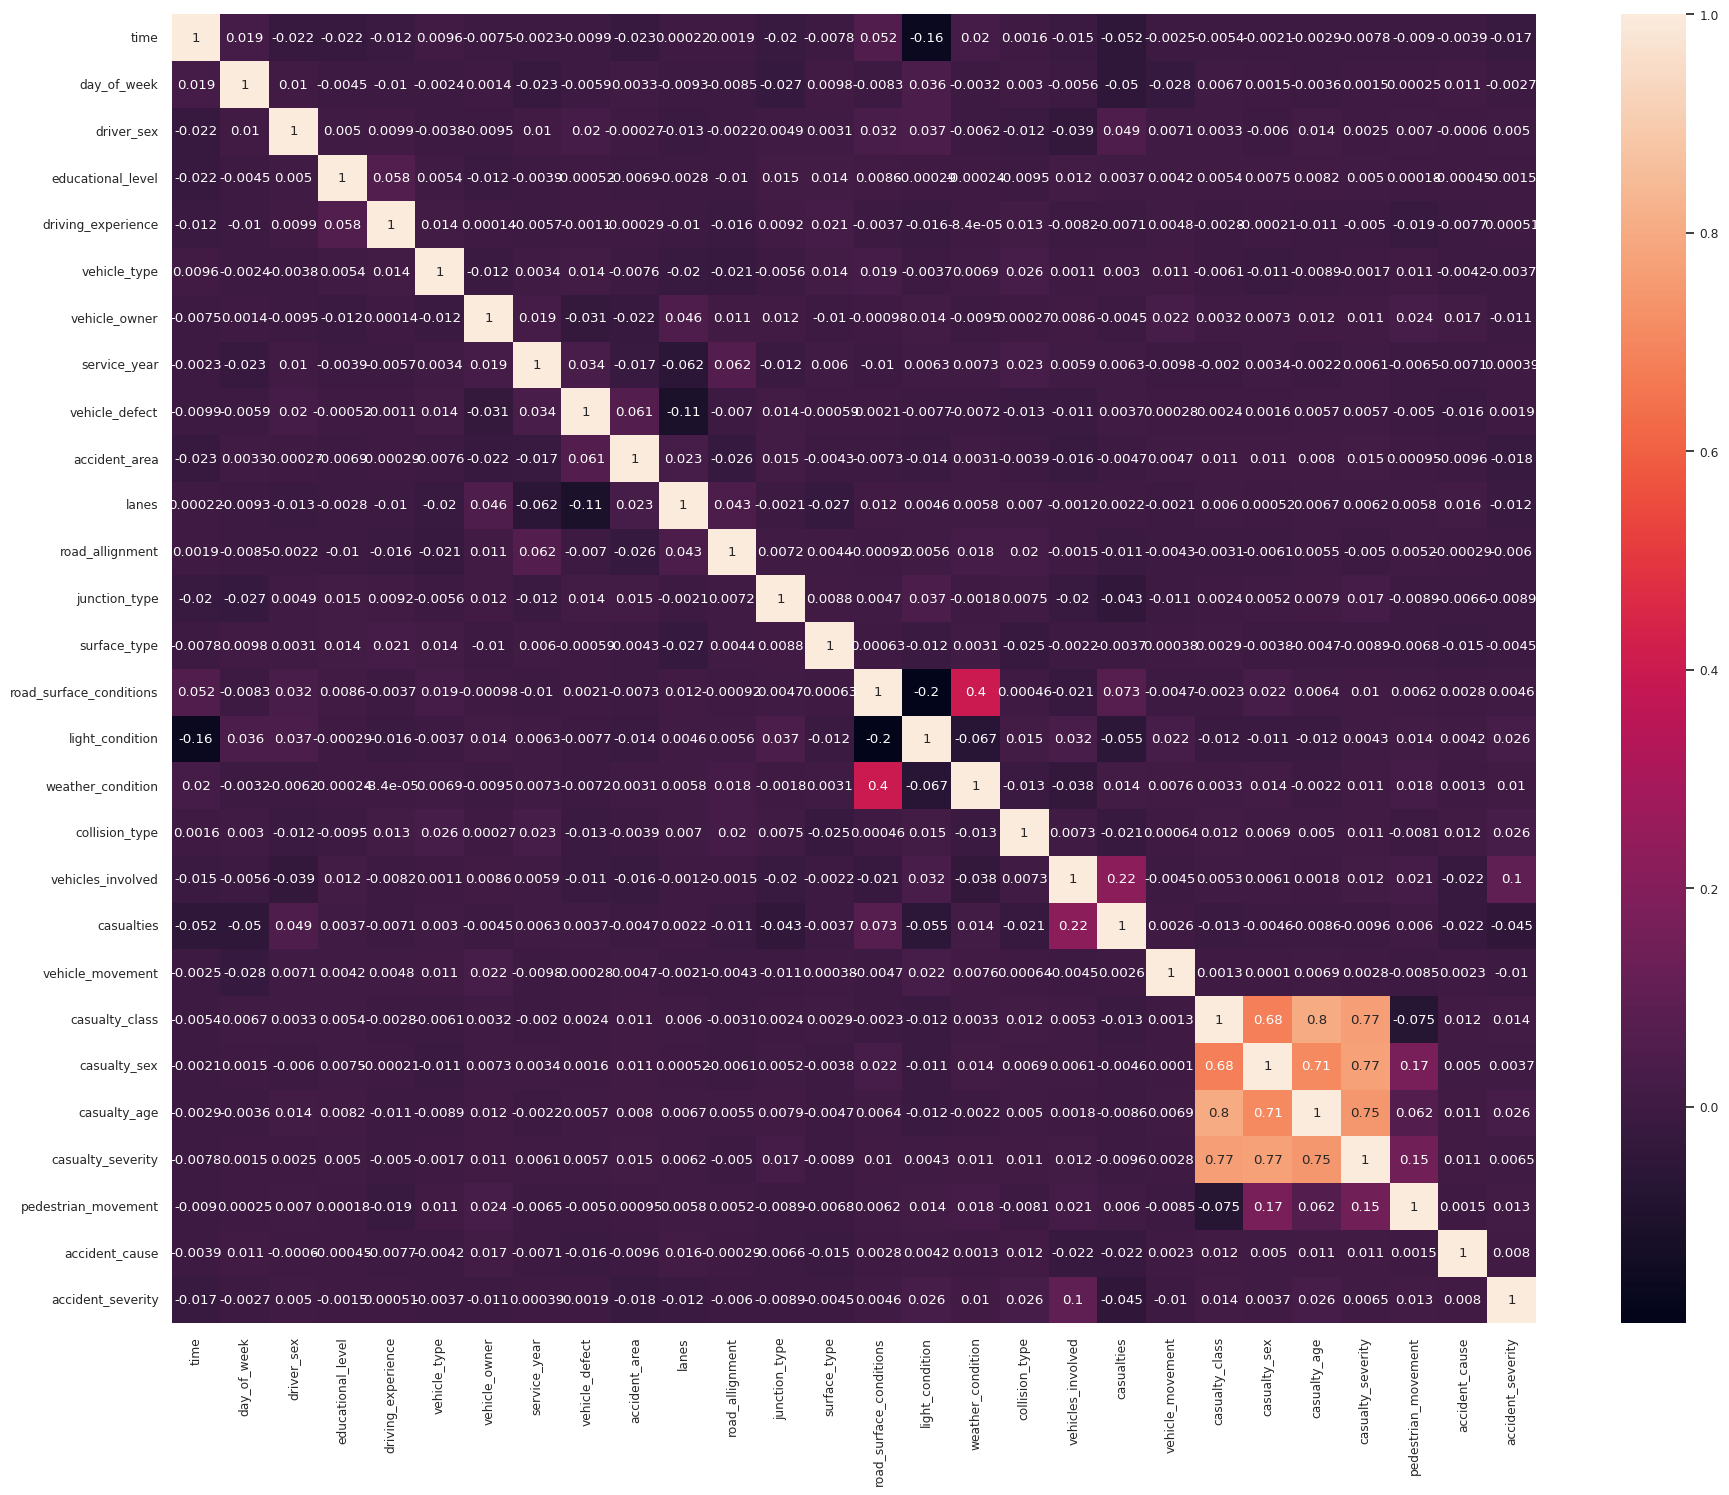

In [40]:
plt.figure(figsize=(22,17))
sns.set(font_scale=0.8)
sns.heatmap(data.corr(), annot=True)

### Upsampling

In [41]:
X = data.drop('accident_severity', axis=1)
y = data['accident_severity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(8621, 27) (3695, 27) (8621,) (3695,)


In [42]:
# Upsampling using smote

counter = Counter(y_train)

print("\n")

for k,v in counter.items():
  per = 100*v/len(y_train)
  print(f"Class= {k}, n={v} ({per:.2f}%)")

oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)

counter = Counter(y_train)

print("\n")

for k,v in counter.items():
  per = 100*v/len(y_train)
  print(f"Class= {k}, n={v} ({per:.2f}%)")

print("\n")

print("Upsampled data shape: ", X_train.shape, y_train.shape)



Class= 2, n=7324 (84.96%)
Class= 1, n=1191 (13.82%)
Class= 0, n=106 (1.23%)


Class= 2, n=7324 (33.33%)
Class= 1, n=7324 (33.33%)
Class= 0, n=7324 (33.33%)


Upsampled data shape:  (21972, 27) (21972,)


## Modelling

In [43]:
X = data.drop('accident_severity', axis=1)
y = data['accident_severity']

In [44]:
def modelling(X_train, y_train, X_test, y_test, **kwargs):
    scores = {}
    models = []
    bvd = {}
    if 'xgb' in kwargs.keys() and kwargs['xgb']:
        xgb = XGBClassifier()
        xgb.fit(X_train._get_numeric_data(), np.ravel(y_train, order='C'))
        y_pred = xgb.predict(X_test._get_numeric_data())
        scores['xgb']= [accuracy_score(y_test, y_pred)]
        models.append(xgb)


    if 'rf' in kwargs.keys() and kwargs['rf']:
        rf = RandomForestClassifier(n_estimators=200)
        rf.fit(X_train, y_train)
        y_pred = rf.predict(X_test)
        scores['rf']= [accuracy_score(y_test, y_pred)]
        models.append(rf)

    if 'extree' in kwargs.keys() and kwargs['extree']:
        extree = ExtraTreesClassifier()
        extree.fit(X_train, y_train)
        y_pred = extree.predict(X_test)
        scores['extree'] = [accuracy_score(y_test, y_pred)]
        models.append(extree)

    return scores,models

In [45]:
scores, models = modelling(X_train, y_train, X_test, y_test, xgb=True, rf=True, extree=True)
print(scores)

{'xgb': [0.8083897158322056], 'rf': [0.79702300405954], 'extree': [0.8054127198917456]}


## Hyperparameter Tuning

In [50]:
gkf = KFold(n_splits=3, shuffle=True, random_state=42).split(X=X_train, y=y_train)

# A parameter grid for XGB
params = {
    'booster': ['gbtree', 'gblinear'],
    'eta': [0.1, 0.4],
    'max_depth': [3,7],
}

xgb_estimator = XGBClassifier()

gsearch = GridSearchCV(estimator=xgb_estimator,
                       param_grid=params,
                       scoring='f1_weighted',
                       n_jobs=-1,
                       cv=gkf,
                       verbose=1)

xgb_model = gsearch.fit(X=X_train, y=y_train)
(gsearch.best_params_, gsearch.best_score_)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


({'booster': 'gbtree', 'eta': 0.4, 'max_depth': 7}, 0.9392789005108829)